# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [29]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm
from transformers import Trainer, TrainingArguments
import re
import pyarrow as pa
from datasets import Dataset
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel
from sklearn.model_selection import train_test_split
from datasets import load_metric

# 2. Îç∞Ïù¥ÌÑ∞Î∂àÎü¨Ïò§Í∏∞ Î∞è EDA

In [5]:
data = pd.read_csv('/content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/DKTC data/train.csv')

In [6]:
data.shape

(3950, 3)

In [7]:
data.head()

idx      class                                       conversation
0    0      ÌòëÎ∞ï ÎåÄÌôî  ÏßÄÍ∏à ÎÑà Ïä§Ïä§Î°úÎ•º Ï£ΩÏó¨Îã¨ÎùºÍ≥† Ïï†ÏõêÌïòÎäî Í≤ÉÏù∏Í∞Ä?\n ÏïÑÎãôÎãàÎã§. Ï£ÑÏÜ°Ìï©ÎãàÎã§.\n Ï£ΩÏùÑ ...
1    1      ÌòëÎ∞ï ÎåÄÌôî  Í∏∏ÎèôÍ≤ΩÏ∞∞ÏÑúÏûÖÎãàÎã§.\n9Ïãú 40Î∂Ñ ÎßàÌä∏Ïóê Ìè≠Î∞úÎ¨ºÏùÑ ÏÑ§ÏπòÌï†Í±∞Îã§.\nÎÑ§?\nÎòëÎ∞îÎ°ú Îì§Ïñ¥ ...
2    2  Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî  ÎÑà ÎêòÍ≤å Í∑ÄÏó¨Ïö¥Í±∞ ÏïåÏßÄ? ÎÇòÎ≥¥Îã§ ÏûëÏùÄ ÎÇ®ÏûêÎäî Ï≤®Î¥§Ïñ¥.\nÍ∑∏ÎßåÌï¥. ÎãàÎì§ ÎÜÄÎ¶¨ÎäîÍ±∞ Ïû¨ÎØ∏...
3    3      Í∞àÏ∑® ÎåÄÌôî  Ïñ¥Ïù¥ Í±∞Í∏∞\nÏòà??\nÎÑà ÎßêÏù¥Ïïº ÎÑà. Ïù¥Î¶¨ Ïò§ÎùºÍ≥†\nÎ¨¥Ïä® Ïùº.\nÎÑà Ïò∑ Ï¢ãÏïÑÎ≥¥Ïù∏Îã§?...
4    4      Í∞àÏ∑® ÎåÄÌôî  Ï†ÄÍ∏∞Ïöî ÌòπÏãú ÎÇ†Ïù¥ ÎÑàÎ¨¥ Îú®Í≤ÅÏûñÏïÑÏöî? Ï†ÄÌù¨ ÌöåÏÇ¨ÏóêÏÑú Ïù¥ ÏÑ†ÌÅ¨Î¶º ÌååÎäîÎç∞ Ìïú Î≤à ÏÜêÎì±Ïóê ...

In [8]:
data['class'].value_counts()

Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî      1094
Í∞àÏ∑® ÎåÄÌôî           981
ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî     979
ÌòëÎ∞ï ÎåÄÌôî           896
Name: class, dtype: int64

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨Î∞è ÌÉÄÏûÖÎ≥ÄÍ≤Ω

In [9]:
data.rename(columns={'class':'label'}, inplace=True)

In [10]:
# remove '\n' in sentence
import re
def preprocess(sentence):
    return re.sub('\n', '', sentence)

data['conversation'] = data['conversation'].apply(lambda x: preprocess(x))

In [11]:
label_list = {'Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî':0, 'Í∞àÏ∑® ÎåÄÌôî':1, 'ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî':2, 'ÌòëÎ∞ï ÎåÄÌôî':3}
label_list

{'Í∏∞ÌÉÄ Í¥¥Î°≠Ìûò ÎåÄÌôî': 0, 'Í∞àÏ∑® ÎåÄÌôî': 1, 'ÏßÅÏû• ÎÇ¥ Í¥¥Î°≠Ìûò ÎåÄÌôî': 2, 'ÌòëÎ∞ï ÎåÄÌôî': 3}

In [12]:
data['label'] = data['label'].apply(lambda x: label_list[x])

In [13]:
data.head()

idx  label                                       conversation
0    0      3  ÏßÄÍ∏à ÎÑà Ïä§Ïä§Î°úÎ•º Ï£ΩÏó¨Îã¨ÎùºÍ≥† Ïï†ÏõêÌïòÎäî Í≤ÉÏù∏Í∞Ä? ÏïÑÎãôÎãàÎã§. Ï£ÑÏÜ°Ìï©ÎãàÎã§. Ï£ΩÏùÑ Í±∞Î©¥ Ìòº...
1    1      3  Í∏∏ÎèôÍ≤ΩÏ∞∞ÏÑúÏûÖÎãàÎã§.9Ïãú 40Î∂Ñ ÎßàÌä∏Ïóê Ìè≠Î∞úÎ¨ºÏùÑ ÏÑ§ÏπòÌï†Í±∞Îã§.ÎÑ§?ÎòëÎ∞îÎ°ú Îì§Ïñ¥ ÌïúÎ≤àÎßå Îçî ...
2    2      0  ÎÑà ÎêòÍ≤å Í∑ÄÏó¨Ïö¥Í±∞ ÏïåÏßÄ? ÎÇòÎ≥¥Îã§ ÏûëÏùÄ ÎÇ®ÏûêÎäî Ï≤®Î¥§Ïñ¥.Í∑∏ÎßåÌï¥. ÎãàÎì§ ÎÜÄÎ¶¨ÎäîÍ±∞ Ïû¨ÎØ∏ÏóÜÏñ¥...
3    3      1  Ïñ¥Ïù¥ Í±∞Í∏∞Ïòà??ÎÑà ÎßêÏù¥Ïïº ÎÑà. Ïù¥Î¶¨ Ïò§ÎùºÍ≥†Î¨¥Ïä® Ïùº.ÎÑà Ïò∑ Ï¢ãÏïÑÎ≥¥Ïù∏Îã§?Ïñò Îèà Ï¢Ä ÏûàÎÇò...
4    4      1  Ï†ÄÍ∏∞Ïöî ÌòπÏãú ÎÇ†Ïù¥ ÎÑàÎ¨¥ Îú®Í≤ÅÏûñÏïÑÏöî? Ï†ÄÌù¨ ÌöåÏÇ¨ÏóêÏÑú Ïù¥ ÏÑ†ÌÅ¨Î¶º ÌååÎäîÎç∞ Ìïú Î≤à ÏÜêÎì±Ïóê ...

In [14]:
# convert to Huggingface dataset
import pyarrow as pa
from datasets import Dataset

data = Dataset(pa.Table.from_pandas(data))

In [15]:
type(data)

datasets.arrow_dataset.Dataset

In [16]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel

tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')
model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels = 4)
# model = AutoModel.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/248k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/495k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [17]:
def transform(data):
  return tokenizer(
      data['conversation'],
      truncation = True,
      padding = 'max_length',
      return_token_type_ids = True,
      )
  
examples = data[:3]
examples_transformed = transform(examples)

print(examples)
print(examples_transformed)

{'idx': [0, 1, 2], 'label': [3, 3, 0], 'conversation': ['ÏßÄÍ∏à ÎÑà Ïä§Ïä§Î°úÎ•º Ï£ΩÏó¨Îã¨ÎùºÍ≥† Ïï†ÏõêÌïòÎäî Í≤ÉÏù∏Í∞Ä? ÏïÑÎãôÎãàÎã§. Ï£ÑÏÜ°Ìï©ÎãàÎã§. Ï£ΩÏùÑ Í±∞Î©¥ ÌòºÏûê Ï£ΩÏßÄ Ïö∞Î¶¨ÍπåÏßÄ ÏÇ¨Í±¥Ïóê ÌúòÎßêÎ¶¨Í≤å Ìï¥? ÏßÑÏßú Ï£ΩÏó¨Î≤ÑÎ¶¨Í≥† Ïã∂Í≤å. Ï†ïÎßê ÏûòÎ™ªÌñàÏäµÎãàÎã§. ÎÑàÍ∞Ä ÏÑ†ÌÉùÌï¥. ÎÑàÍ∞Ä Ï£ΩÏùÑÎûò ÎÑ§ Í∞ÄÏ°±ÏùÑ Ï£ΩÏó¨Ï§ÑÍπå. Ï£ÑÏÜ°Ìï©ÎãàÎã§. Ï†ïÎßê ÏûòÎ™ªÌñàÏäµÎãàÎã§. ÎÑàÏóêÍ≤åÎäî ÏÑ†ÌÉùÍ∂åÏù¥ ÏóÜÏñ¥. ÏÑ†ÌÉù Î™ªÌïúÎã§Î©¥ ÎÑàÏôÄ ÎÑ§ Í∞ÄÏ°±ÍπåÏßÄ Î™®Ï°∞Î¶¨ Ï£ΩÏó¨Î≤ÑÎ¶¥Í±∞Ïïº. ÏÑ†ÌÉù Î™ªÌïòÍ≤†ÏäµÎãàÎã§. ÌïúÎ≤àÎßå ÎèÑÏôÄÏ£ºÏÑ∏Ïöî. Í∑∏ÎÉ• Îã§ Ï£ΩÏó¨Î≤ÑÎ†§ÏïºÍ≤†Íµ∞. Ïù¥Ïùò ÏóÜÏßÄ? Ï†úÎ∞ú ÎèÑÏôÄÏ£ºÏÑ∏Ïöî.', 'Í∏∏ÎèôÍ≤ΩÏ∞∞ÏÑúÏûÖÎãàÎã§.9Ïãú 40Î∂Ñ ÎßàÌä∏Ïóê Ìè≠Î∞úÎ¨ºÏùÑ ÏÑ§ÏπòÌï†Í±∞Îã§.ÎÑ§?ÎòëÎ∞îÎ°ú Îì§Ïñ¥ ÌïúÎ≤àÎßå Îçî ÏñòÍ∏∞ÌïúÎã§.Ïû•ÎÇúÏ†ÑÌôî Í±∏ÏßÄ ÎßàÏãúÏ£†. 9Ïãú 40Î∂Ñ ÎßàÌä∏Ïóê Ìè≠Î∞úÎ¨ºÏù¥ ÌÑ∞ÏßÄÎ©¥ Îã§ Ï£ΩÎäîÍ±∞Ïïº. Ïû•ÎÇúÏ†ÑÌôîÎäî ÏóÖÎ¨¥Î∞©Ìï¥Ï£ÑÏóê Ìï¥ÎãπÎê©ÎãàÎã§.ÌåêÎã®ÏùÄ ÎÑàÏóêÍ≤å Îã¨Î†§ÏûàÎã§. Í∏∏ÎèôÍ≤ΩÏ∞∞ÏÑúÏóêÎèÑ Ìè≠Î∞úÎ¨º ÌÑ∞ÏßÄÎ©¥ ÍΩ§ÎÇò Ïû¨ÎØ∏ÏûàÍ≤†ÏßÄ.ÏÑ†ÏÉùÎãò 

In [18]:
encoded_data = data.map(transform, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

In [19]:
from sklearn.model_selection import train_test_split
train_dataset, validation_dataset= encoded_data.train_test_split(test_size=0.1).values()

In [20]:
train_dataset

Dataset({
    features: ['idx', 'label', 'conversation', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 3555
})

In [21]:
print(len(train_dataset['token_type_ids']))
print(len(train_dataset['label']))
print(len(train_dataset['idx']))
print(len(train_dataset['conversation']))
print(len(train_dataset['attention_mask']))

3555
3555
3555
3555
3555


In [22]:
set(train_dataset['label'])

{0, 1, 2, 3}

In [23]:
validation_dataset

Dataset({
    features: ['idx', 'label', 'conversation', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 395
})

In [24]:
print(len(validation_dataset['token_type_ids']))
print(len(validation_dataset['label']))
print(len(validation_dataset['idx']))
print(len(validation_dataset['conversation']))
print(len(validation_dataset['attention_mask']))

395
395
395
395
395


In [25]:
set(validation_dataset['label'])

{0, 1, 2, 3}

(array([   0.,    0.,    0.,    0.,    0., 3555.,    0.,    0.,    0.,
           0.]),
 array([511.5, 511.6, 511.7, 511.8, 511.9, 512. , 512.1, 512.2, 512.3,
        512.4, 512.5]),
 <a list of 10 Patch objects>)

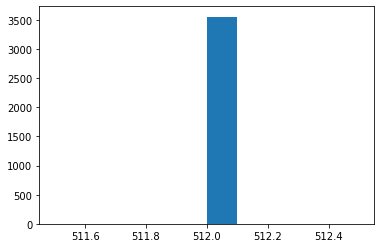

In [26]:
le = []
for s in train_dataset['input_ids']:
    le.append(len(s))

plt.hist(le)

(array([  0.,   0.,   0.,   0.,   0., 395.,   0.,   0.,   0.,   0.]),
 array([511.5, 511.6, 511.7, 511.8, 511.9, 512. , 512.1, 512.2, 512.3,
        512.4, 512.5]),
 <a list of 10 Patch objects>)

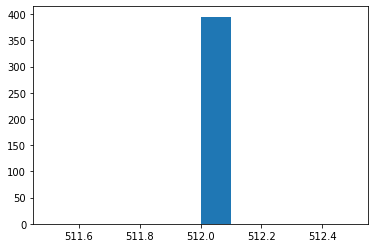

In [37]:
le = []
for s in validation_dataset['input_ids']:
    le.append(len(s))

plt.hist(le)

# 4. ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä, Î™®Îç∏ ÏÉùÏÑ±

# 5. Train

In [38]:
# TrainerÏùÑ ÌôúÏö©ÌïòÎäî ÌòïÌÉúÎ°ú Î™®Îç∏ Ïû¨ÏÉùÏÑ±
from transformers import Trainer, TrainingArguments
output_dir = '/content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any'
metric_name = 'accuracy'

training_arguments = TrainingArguments(
    output_dir, 
    evaluation_strategy="epoch", #evaluationÌïòÎäî ÎπàÎèÑ
    learning_rate = 2e-5, 
    per_device_train_batch_size = 16, 
    per_device_eval_batch_size = 16, 
    num_train_epochs = 3,
    weight_decay = 0.01
)

In [39]:
from datasets import load_metric
metric = load_metric("accuracy")

def compute_metrics(eval_pred):    
    predictions,labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references = labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  


In [40]:
trainer = Trainer(
    model=model,                           
    args=training_arguments,                  
    train_dataset=train_dataset,    
    eval_dataset=validation_dataset,      
    compute_metrics=compute_metrics
)
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, conversation. If idx, conversation are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3555
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 669


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, conversation. If idx, conversation are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 395
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, conversation. If idx, conversation are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 395
  Batch size = 16
Saving model checkpoint to /content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any/checkpoint-500
Configuration saved in /content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any/checkpoint-500/pytorch_model.bin
The following columns in

TrainOutput(global_step=669, training_loss=0.2837871186580002, metrics={'train_runtime': 1055.2593, 'train_samples_per_second': 10.107, 'train_steps_per_second': 0.634, 'total_flos': 2806129794723840.0, 'train_loss': 0.2837871186580002, 'epoch': 3.0})

# F1 score

In [30]:
model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels = 4)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [31]:
metric = load_metric("f1")

def compute_metrics(eval_pred):    
    predictions,labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return metric.compute(predictions=predictions, references = labels, average="micro")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  """Entry point for launching an IPython kernel.


In [33]:
output_dir = '/content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any'

training_arguments = TrainingArguments(
    output_dir, 
    evaluation_strategy="epoch", #evaluationÌïòÎäî ÎπàÎèÑ
    learning_rate = 2e-5, 
    per_device_train_batch_size = 16, 
    per_device_eval_batch_size = 16, 
    num_train_epochs = 3,
    weight_decay = 0.01
)

In [36]:
trainer = Trainer(
    model=model,                           
    args=training_arguments,                  
    train_dataset=train_dataset,    
    eval_dataset=validation_dataset,      
    compute_metrics=compute_metrics
)
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, conversation. If idx, conversation are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3555
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 669


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, conversation. If idx, conversation are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 395
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: idx, conversation. If idx, conversation are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 395
  Batch size = 16
Saving model checkpoint to /content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any/checkpoint-500
Configuration saved in /content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any/checkpoint-500/config.json
Model weights saved in /content/drive/MyDrive/ÏïÑÏù¥Ìé†ÌÜ§/any/checkpoint-500/pytorch_model.bin
The following columns in

TrainOutput(global_step=669, training_loss=0.31133099486118654, metrics={'train_runtime': 1006.9042, 'train_samples_per_second': 10.592, 'train_steps_per_second': 0.664, 'total_flos': 2806129794723840.0, 'train_loss': 0.31133099486118654, 'epoch': 3.0})